In [1]:
# Dependencies 
tetration_dl = os.environ.get('TETRATION_DL', os.getcwd())
sys.path.append(tetration_dl)
from sage_tetration import *

# The super cube root function

Defined as $\verb|superroot_3|(z) = x$ if and only if $x^{x^x} = z$. It is usually written $\sqrt[3]{z}_s$.

In [215]:
import logging

def hexparser(s):
    try:
        x = float.fromhex(s.strip())
    except Exception as err:
        #logging.error("%s %s" % (s, repr(err)), exc_info=True)
        return 0
    return x

def complexcombiner(re, im):
    return re + im*I

def load2d(path, ring=CC, parser=hexparser, combiner=complexcombiner, columns=2):
    with open(path) as fp:
        lines = fp.readlines()
    def parse_line(row):
        if row.startswith('#'):
            return None
        if columns - row.count(',') != 1:
            return None
        row = map(lambda cell: ring(parser(cell)), row.split(','))
        try:
            row = combiner(*row)
        except Exception as err:
            logging.error("%s %s %s " % (row, repr(err)), exc_info=True)
            return None
        return row
    return filter(lambda x: x != None, map(parse_line, lines))

def load1d(path, ring=RR, parser=hexparser):
    with open(path) as fp:
        lines = fp.readlines()
    return map(lambda cell: ring(parser(cell)), lines)

def sum_egf_series(z, ring=None, egf_coefficients=None):
    ser = sum([ring(c)*z^k/ring(factorial(k)) for k, c in enumerate(egf_coefficients)])
    try:
        ser = ser.O(order + 1)
    except:
        pass
    return ser

SUPERROOT_CACHE = {}

SUPERROOT_CACHE['_@1+1I#100'] = load2d('superroot_3_at1i1_series.txt', ring=CC)[:int(100)]
def superroot_3_at1i1_series(z, ring=CC, cache=SUPERROOT_CACHE):
    return sum_egf_series(z, ring, cache['_@1+1I#100'])

SUPERROOT_CACHE['_@0+1I#100'] = load2d('superroot_3_at0i1_series.txt', ring=CC)[:int(100)]
def superroot_3_at0i1_series(z, ring=CC, cache=SUPERROOT_CACHE):
    return sum_egf_series(z, ring, cache['_@0+1I#100'])

SUPERROOT_CACHE['_@0.25+0.25*I#100'] = load2d('superroot_3_at0.25i0.25_series.txt', ring=CC)[:int(100)]
def superroot_3_at0q25i0q25_series(z, ring=CC, cache=SUPERROOT_CACHE):
    return sum_egf_series(z, ring, cache['_@0.25+0.25*I#100'])

SUPERROOT_CACHE['_@0.25#100'] = load1d('superroot_3_at0.25_series.txt')[:int(100)]
def superroot_3_at0q25_series(z, ring=RR, cache=SUPERROOT_CACHE):
    return sum_egf_series(z, ring, cache['_@0.25#100'])

SUPERROOT_CACHE['_@0.5#100'] = load1d('superroot_3_at0.5_series.txt')[:int(100)]
def superroot_3_at0q5_series(z, ring=RR, cache=SUPERROOT_CACHE):
    return sum_egf_series(z, ring, cache['_@0.5#100'])

SUPERROOT_CACHE['_@0.75#100'] = load1d('superroot_3_at0.75_series.txt')[:int(100)]
def superroot_3_at0q75_series(z, ring=RR, cache=SUPERROOT_CACHE):
    return sum_egf_series(z, ring, cache['_@0.75#100'])

SUPERROOT_CACHE['_@1#100'] = load1d('superroot_3_at1_series.txt', ring=QQ, parser=long)
def superroot_3_at1_series(z, ring=QQ, cache=SUPERROOT_CACHE):
    return sum_egf_series(z, ring, cache['_@1#100'])

SUPERROOT_CACHE['_exp@0#100'] = load1d('superroot_3_exp_series.txt', ring=QQ, parser=long)
def superroot_3_exp_series(z, ring=QQ, cache=SUPERROOT_CACHE):
    return sum_egf_series(z, ring, cache['_exp@0#100'])

SUPERROOT_CACHE['log_@0#100'] = load1d('log_superroot_3_at1_series.txt', ring=QQ, parser=long)
def log_superroot_3_at1_series(z, ring=QQ, cache=SUPERROOT_CACHE):
    return sum_egf_series(z, ring, cache['log_@1#100'])

SUPERROOT_CACHE['log_exp@0#100'] = load1d('log_superroot_3_exp_series.txt', ring=QQ, parser=long)
def log_superroot_3_exp_series(z, ring=QQ, cache=SUPERROOT_CACHE):
    return sum_egf_series(z, ring, cache['log_exp@0#100'])


In [231]:
def newton_method(f, x, c, maxiter, h): 
    f(x) = f
    j = 1
    while True:
        c = c - f.subs(**{str(x): c})/diff(f, x).subs(**{str(x): c})
        if f.subs(**{str(x): c-h})*f.subs(**{str(x): c+h}) < 0 or j == maxiter:
            break
        j += 1
    return c

def superroot_2(z):
    return log(z)/lambert_w(log(z))

def iterexproot_2(y, z):
    return superroot_2(y^z)^(1/z)

def iterexproot_3(y, z, x_est=None):
    return 0
    if x_est is None:
        x_est = y
    for _ in range(10):
        if real(y) < 0:
            x_next = y^(1/x_est^x_est^z)
        elif real(y) == y:
            x_next = real(iterexproot_2(y^z, x_est^z/z)^(1/z))
        else:
            x_next = iterexproot_2(y^z, x_est^z/z)^(1/z)
        if x_next == x_est:
            return x_next
        else:
            x_est = x_next
    return x_next

def superroot_3(z, x_est=1):
    bp = 0.731531897477381+0.293308661285157*I
    if z == 0:
        return 0
    elif z == 1:
        return 1
    elif imag(z) > imag(bp) and abs(z - (1 + I)) < 0.75:
        return superroot_3_at1i1_series(N(z - (1 + I)))
    elif -imag(bp) > imag(z) and abs(conjugate(z) - (1 + I)) < 0.75:
        return conjugate(superroot_3_at1i1_series(N(conjugate(z) - (1 + I))))
    elif -imag(bp) <= imag(z) and imag(z) <= imag(bp) and abs(z - (3/4)) < 0.3:
        return superroot_3_at0q75_series(N(z - (3/4)))
    elif real(z) < real(bp):
        if imag(z) > imag(bp):
            if abs(z - (I)) < 1:
                return superroot_3_at0i1_series(N(z - (I)))
            else:
                return iterexproot_3(z, 1, x_est=x_est)
        elif imag(z) < -imag(bp):
            if abs(z - (-I)) < 1:
                return conjugate(superroot_3_at0i1_series(N(conjugate(z) - (I))))
            else:
                return iterexproot_3(z, 1, x_est=x_est)
        else:
            if abs(z - 1/4) < 0.25:
                return superroot_3_at0q25_series(N(z - 1/4))
            elif abs(z - 1/2) < 0.35:
                return superroot_3_at0q5_series(N(z - 1/2))
            elif abs(z - (1/4+1/4*I)) < 0.35:
                return superroot_3_at0q25i0q25_series(N(z - (1/4+1/4*I)))
            elif abs(z - (1/4-1/4*I)) < 0.35:
                return conjugate(superroot_3_at0q25i0q25_series(N(conjugate(z) - (1/4+1/4*I))))
            else:
                return iterexproot_3(z, 1, x_est=x_est)
    elif abs(z - 1) < 0.4:
        return superroot_3_at1_series(N(z - 1))
    elif abs(log(z)) < 0.45:
        return superroot_3_exp_series(N(log(z)))
    return iterexproot_3(z, 1, x_est=x_est)

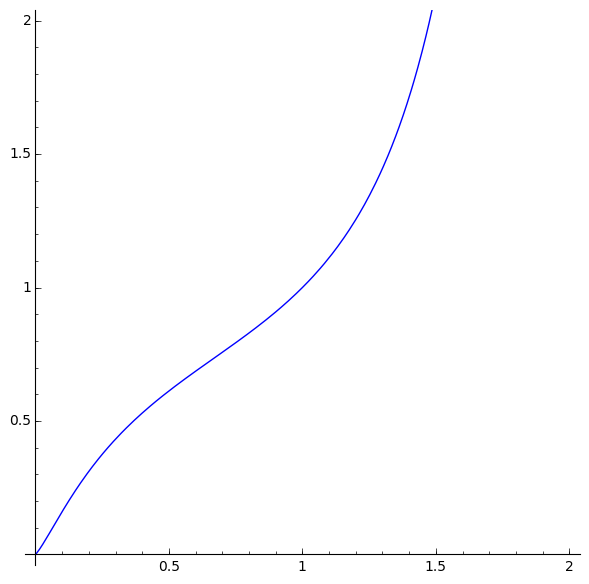

In [228]:
plot(lambda z: real(z^z^z), (0, 2), ymin=0, ymax=2, aspect_ratio=1)

In [229]:
plot(lambda z: real(superroot_3(z)), (0, 2), ymin=0, ymax=2, aspect_ratio=1)

In [41]:
PS.<x> = PowerSeriesRing(QQ)
superroot_3_at1_series(x, 10)

1 + 3*x - 3*x^2 + 2*x^3 + 35/6*x^4 - 51/2*x^5 + 5747/120*x^6 - 50/3*x^7 - 56269/280*x^8 + 52079/72*x^9 - 17977553/15120*x^10 + O(x^11)

In [42]:
PS.<x> = PowerSeriesRing(QQ)
superroot_3_exp_series(x, 10)

1 - 2*x + 11/2*x^2 - 13/3*x^3 - 133/12*x^4 + 264/5*x^5 - 12277/120*x^6 + 1157/35*x^7 + 32353/70*x^8 - 5037359/3024*x^9 + 3450893/1260*x^10 + O(x^11)

In [32]:
superroot_3_series_at_1(x, 10)

1 + 3*x - 3*x^2 + 2*x^3 + 35/6*x^4 - 51/2*x^5 + 5747/120*x^6 - 50/3*x^7 - 56269/280*x^8 + 52079/72*x^9 - 17977553/15120*x^10 + O(x^11)

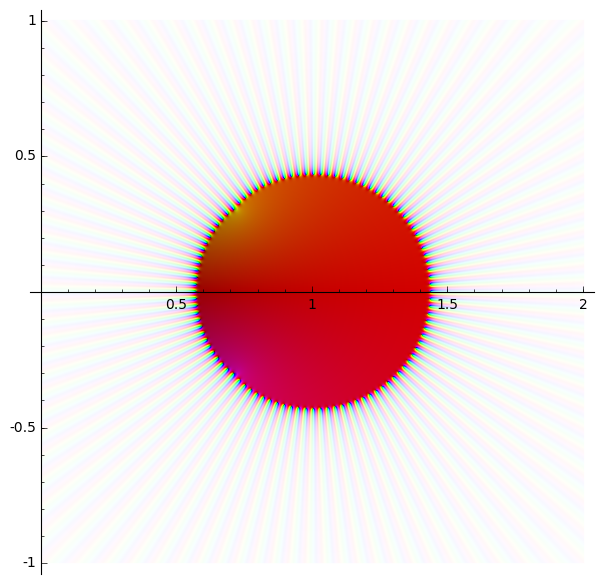

In [137]:
complex_plot(lambda z: superroot_3_at1_series(N(z - 1)), (0, 2), (-1, 1), aspect_ratio=1, plot_points=800)

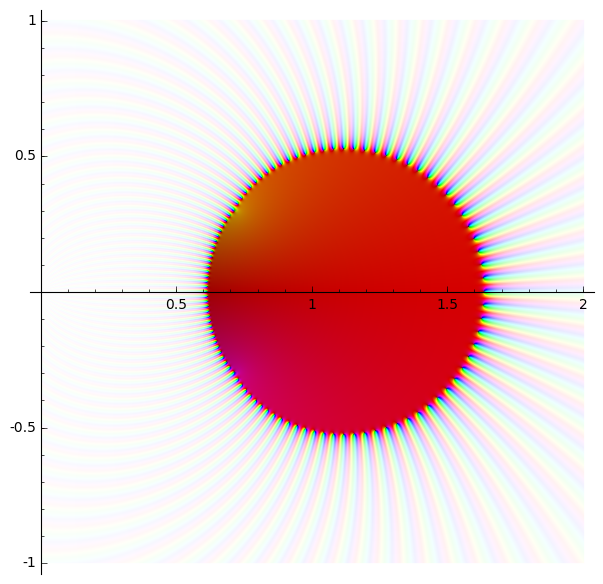

In [138]:
complex_plot(lambda z: superroot_3_exp_series(N(log(z))), (0, 2), (-1, 1), aspect_ratio=1, plot_points=800)

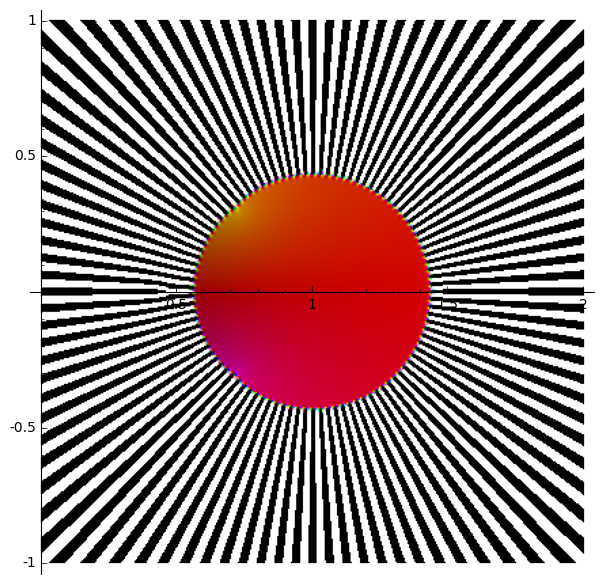

In [139]:
complex_plot(lambda z: exp(log_superroot_3_at1_series(N(z - 1))), (0, 2), (-1, 1), aspect_ratio=1, plot_points=400)

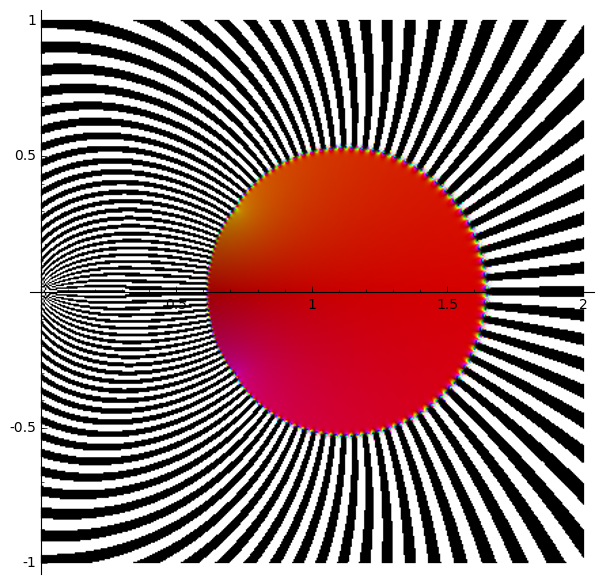

In [140]:
complex_plot(lambda z: exp(log_superroot_3_exp_series(N(log(z)))), (0, 2), (-1, 1), aspect_ratio=1, plot_points=400)

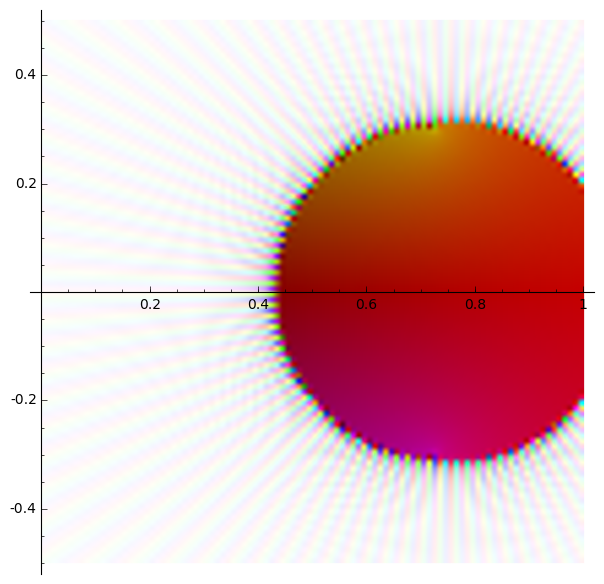

In [196]:
complex_plot(lambda z: superroot_3_at0q75_series(N(z - 3/4)), (0, 1), (-0.5, 0.5), aspect_ratio=1, plot_points=100)

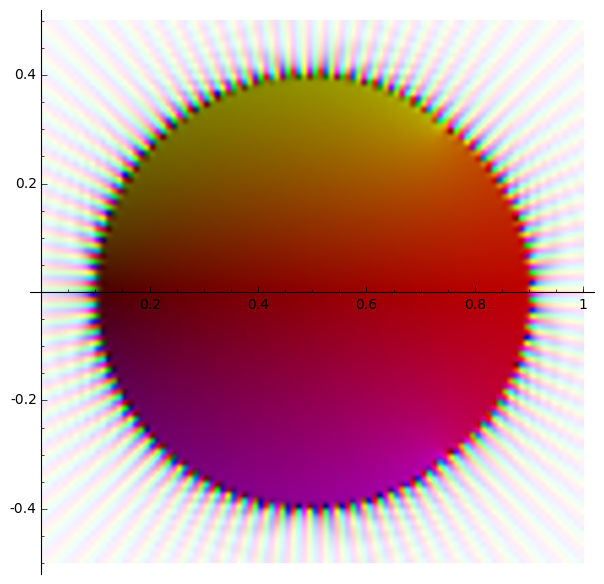

In [197]:
complex_plot(lambda z: superroot_3_at0q5_series(N(z - 1/2)), (0, 1), (-0.5, 0.5), aspect_ratio=1, plot_points=100)

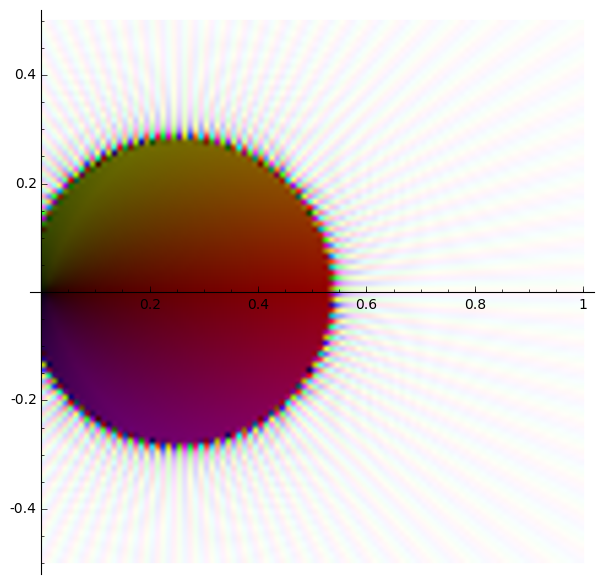

In [174]:
complex_plot(lambda z: superroot_3_at0q25_series(N(z - 1/4)), (0, 1), (-0.5, 0.5), aspect_ratio=1, plot_points=100)

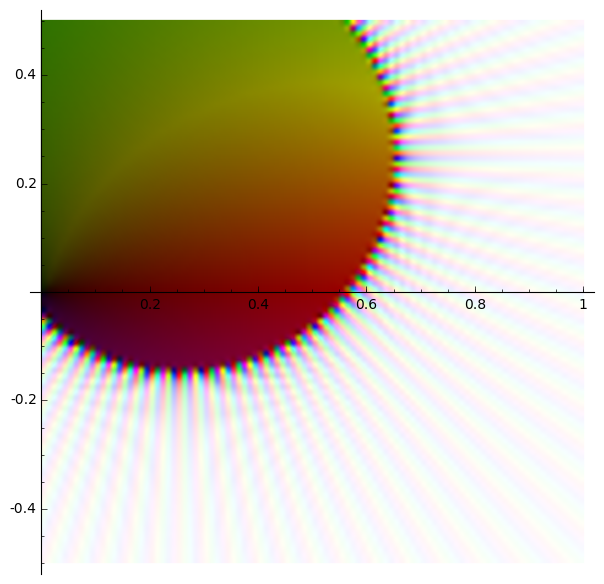

In [175]:
complex_plot(lambda z: superroot_3_at0q25i0q25_series(N(z - (1/4+1/4*I))), (0, 1), (-0.5, 0.5), aspect_ratio=1, plot_points=100)

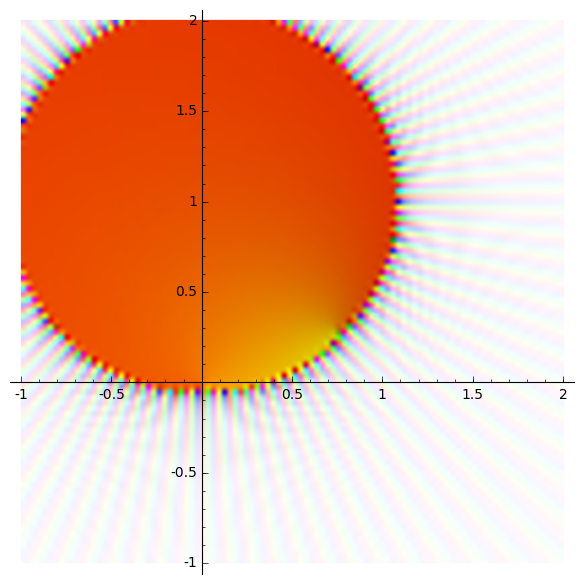

In [184]:
complex_plot(lambda z: superroot_3_at0i1_series(N(z - (I))), (-1, 2), (-1, 2), aspect_ratio=1, plot_points=100)

In [204]:
complex_plot(lambda z: superroot_3_at1i1_series(N(z - (1 + I))), (0, 2), (0, 2), aspect_ratio=1, plot_points=100)

In [130]:
superroot_3_at1_series(x, 10)

1 + x - x^2 + 1/2*x^3 + 7/6*x^4 - 17/4*x^5 + 821/120*x^6 - 25/12*x^7 - 56269/2520*x^8 + 52079/720*x^9 - 1634323/15120*x^10 + O(x^11)

In [131]:
superroot_3_exp_series(x, 10)

1 + x - 1/2*x^2 - 1/3*x^3 + 11/8*x^4 - 23/15*x^5 - 139/144*x^6 + 2677/420*x^7 - 10549/1152*x^8 - 10147/2835*x^9 + 15965129/403200*x^10 + O(x^11)

In [132]:
log_superroot_3_at1_series(x, 10)

x - 3/2*x^2 + 11/6*x^3 - 13/12*x^4 - 133/60*x^5 + 44/5*x^6 - 12277/840*x^7 + 1157/280*x^8 + 32353/630*x^9 - 5037359/30240*x^10 + O(x^11)

In [133]:
log_superroot_3_exp_series(x, 10)

x - x^2 + 1/2*x^3 + 5/6*x^4 - 59/24*x^5 + 259/120*x^6 + 2311/720*x^7 - 65479/5040*x^8 + 594217/40320*x^9 + 5846471/362880*x^10 + O(x^11)

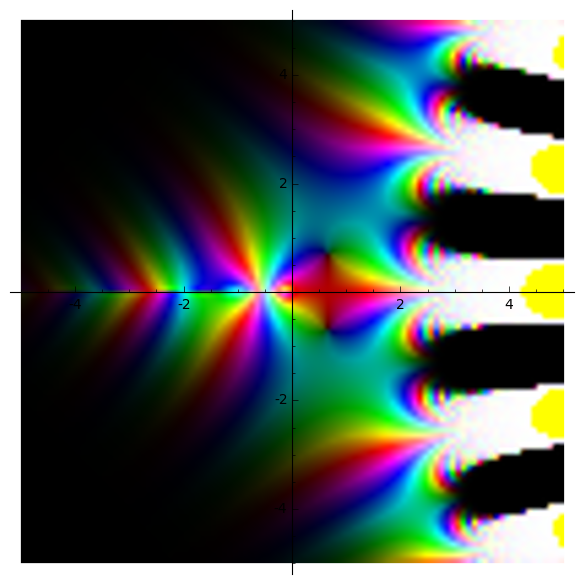

In [240]:
z = var('z')
complex_plot(lambda z0: diff(z^z^z, z).subs(z=z0), (-5, 5), (-5, 5), aspect_ratio=1, plot_points=100)

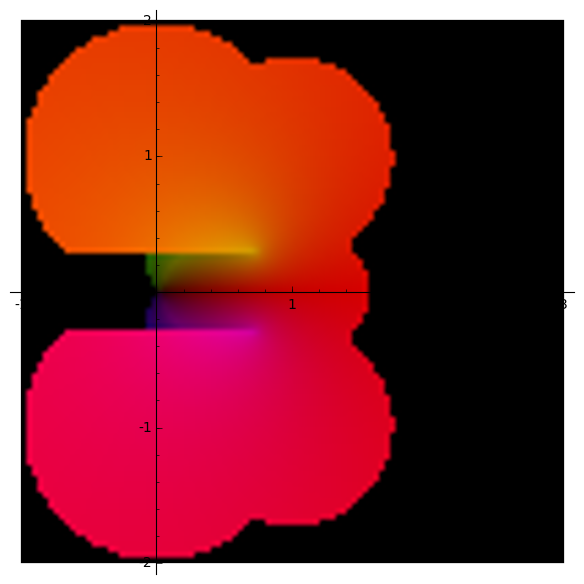

In [232]:
complex_plot(lambda z: superroot_3(z), (-1, 3), (-2, 2), aspect_ratio=1, plot_points=100)

In [214]:
p = complex_plot(lambda z: superroot_3(z), (0, 2), (-1, 1), aspect_ratio=1, plot_points=900, dpi=300)
p

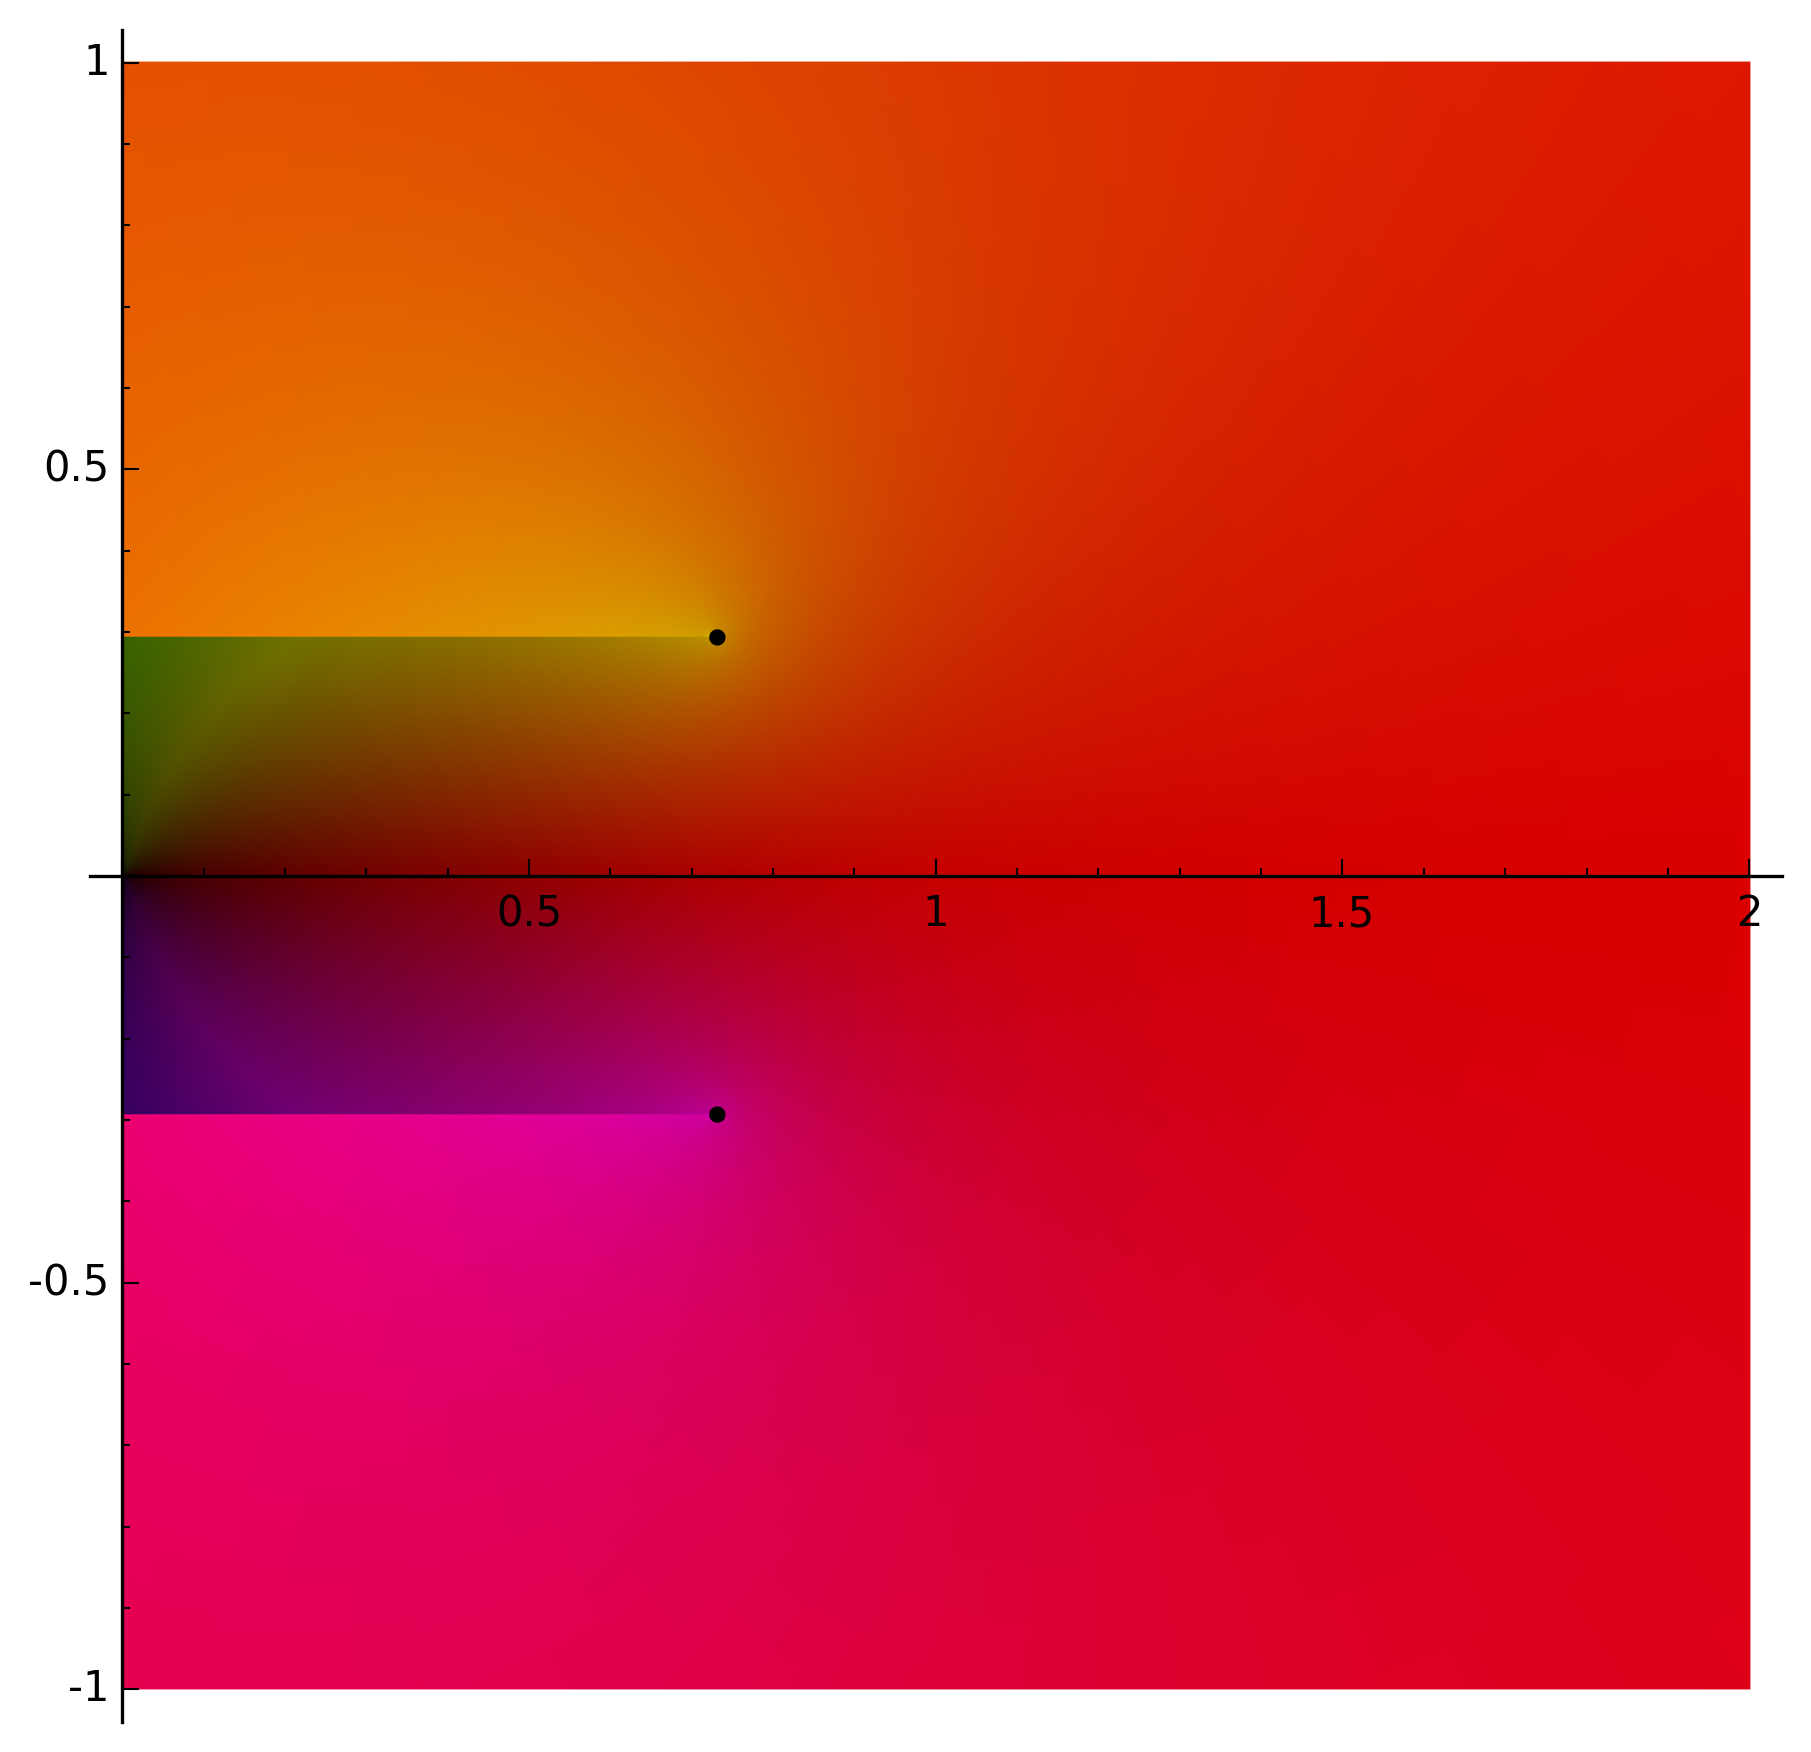

In [217]:
L1 = disk((0.731531897477381, +0.293308661285157), 0.01, (0, 2*pi), zorder=20, rgbcolor=(0, 0, 0))
L2 = disk((0.731531897477381, -0.293308661285157), 0.01, (0, 2*pi), zorder=20, rgbcolor=(0, 0, 0))
#L1 = disk((0.657319327367223, +0.704370182866530), 0.01, (0, 2*pi), zorder=20, rgbcolor=(0, 0, 0))
#L2 = disk((0.657319327367223, -0.704370182866530), 0.01, (0, 2*pi), zorder=20, rgbcolor=(0, 0, 0))
(p + L1 + L2)

In [225]:
superroot_3(0.25)

0.156692604084529

In [226]:
superroot_3(0.5)

0.367376852873425

In [227]:
superroot_3(0.75)

0.689537025983409

In [130]:
table([[N((lambda z: z^z^z)(1/k))] for k in range(1, 20)])

1.00000000000000
  0.612547326536066
  0.466855628173985
  0.375214227246482
  0.311458907098378
  0.264690952488173
  0.229087675497584
  0.201197427184677
  0.178839939165554
  0.160572720432121
  0.145405781317511
  0.132638844385223
  0.121763749196973
  0.112403561199348
  0.104273289349168
  0.0971538069609116
  0.0908741000878771
  0.0852989153069034
  0.0803199946062372

In [216]:
import jsonpickle
SUPERROOT_CACHE

ImportError: No module named jsonpickle

In [239]:
N((z^z^z).subs(z=(1.5 + 3*I)))

1.41659225342921 - 0.128298235418953*I

In [2]:
def f(z0):
    return diff(z^z^z, z).subs(z=z0)
im = float16_complex_graph(f);
im

<PIL.Image.Image image mode=RGB size=250x250 at 0x113ACE7A0>

In [3]:
"done"

'done'